# **Regression Analysis of Fuel Prices and Transport Inflation in India**

This project explores the relationship between international crude oil prices (USD) and transport sector inflation (CPI) in India using a univariate linear regression model. The objective is to assess how fluctuations in global fuel markets affect domestic transportation costs, which directly influence consumer price inflation.

Using monthly time series data (2018–2023), the model attempts to quantify the linear impact of crude oil price movements on India's transport inflation index. Key performance metrics such as R² score, MAE, and RMSE are computed to evaluate model accuracy. The results are visualized through regression plots and the model equation is derived for interpretability.

This analysis is part of a broader econometric ML series to investigate macroeconomic dynamics using machine learning techniques.

# Define Directory Setup

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define NEW Project Path
project_path = '/content/drive/MyDrive/fuel_transport_regression_project_v2'

# Define subfolders
folders = [
    'data/raw',
    'data/processed',
    'data/scripts',
    'notebooks',
    'output/plots',
    'output/metrics',
    'references'
]

# Create folder structure
for folder in folders:
    os.makedirs(os.path.join(project_path, folder), exist_ok=True)

print("✅ Fresh folders created at:", project_path)

Mounted at /content/drive
✅ Fresh folders created at: /content/drive/MyDrive/fuel_transport_regression_project_v2


# Step 1: Download Fresh Crude Oil Price from EIA

In [ ]:
import pandas as pd
import urllib.request

# Download XLS from EIA
eia_url = 'https://www.eia.gov/dnav/pet/hist_xls/RBRTEd.xls'
oil_raw_path = os.path.join(project_path, 'data/raw/crude_oil_price.xls')
urllib.request.urlretrieve(eia_url, oil_raw_path)

# Read XLS
df_oil = pd.read_excel(oil_raw_path, sheet_name='Data 1', skiprows=2)
df_oil.columns = ['Date', 'Crude_Oil_Price_USD']
df_oil.dropna(inplace=True)
df_oil['Date'] = pd.to_datetime(df_oil['Date'])

# Save processed version
oil_processed = os.path.join(project_path, 'data/processed/crude_oil_price.csv')
df_oil.to_csv(oil_processed, index=False)

print("✅ Crude oil data processed and saved.")

✅ Crude oil data processed and saved.


# STEP 2: Simulate Transport CPI Data (until MoSPI data is wired)

In [ ]:
import numpy as np

# Simulate CPI from 2018 to 2023
dates = pd.date_range(start='2018-01-01', end='2023-12-01', freq='MS')
df_transport = pd.DataFrame({
    'Date': dates,
    'Transport_CPI': 150 + 0.3 * np.arange(len(dates)) + np.random.normal(0, 2, len(dates))
})

# Save
transport_path = os.path.join(project_path, 'data/processed/transport_cpi.csv')
df_transport.to_csv(transport_path, index=False)

print("✅ Simulated transport CPI saved.")

✅ Simulated transport CPI saved.


# STEP 3: Merge for Modeling

In [ ]:
# Reload both datasets
df_oil = pd.read_csv(oil_processed, parse_dates=['Date'])
df_transport = pd.read_csv(transport_path, parse_dates=['Date'])

# Merge on Date
df_merged = pd.merge(df_oil, df_transport, on='Date')
df_merged.dropna(inplace=True)

# Save merged dataset
merged_path = os.path.join(project_path, 'data/processed/merged_data.csv')
df_merged.to_csv(merged_path, index=False)

print("✅ Merged dataset ready at:", merged_path)
df_merged.head()

✅ Merged dataset ready at: /content/drive/MyDrive/fuel_transport_regression_project_v2/data/processed/merged_data.csv


,Date,Crude_Oil_Price_USD,Transport_CPI
0,2018-02-01,68.60,151.711626
1,2018-03-01,64.23,148.806268
2,2018-05-01,74.85,150.049485
3,2018-06-01,74.54,152.680708
4,2018-08-01,72.28,150.738303


# PHASE 2: Univariate Regression

Step 1: Load Merged Dataset

In [ ]:
import pandas as pd

merged_path = '/content/drive/MyDrive/fuel_transport_regression_project_v2/data/processed/merged_data.csv'
df = pd.read_csv(merged_path, parse_dates=['Date'])

df.head()

,Date,Crude_Oil_Price_USD,Transport_CPI
0,2018-02-01,68.60,151.711626
1,2018-03-01,64.23,148.806268
2,2018-05-01,74.85,150.049485
3,2018-06-01,74.54,152.680708
4,2018-08-01,72.28,150.738303


Step 2: Visualize Raw Relationship

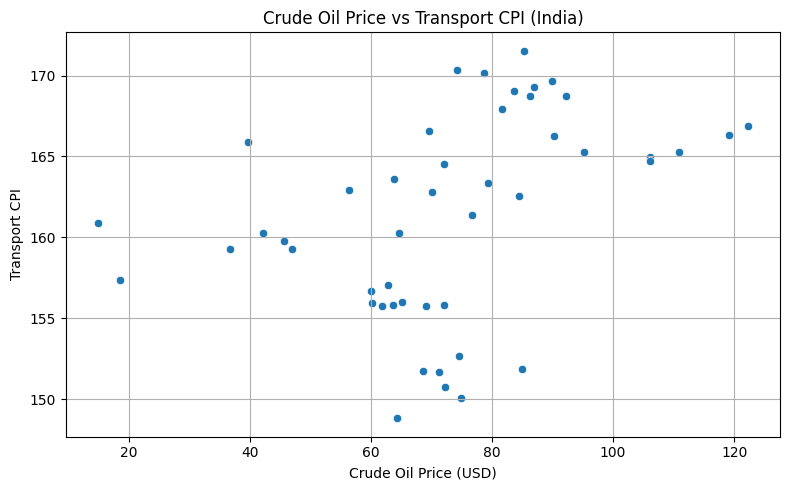

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Crude_Oil_Price_USD', y='Transport_CPI')
plt.title("Crude Oil Price vs Transport CPI (India)")
plt.xlabel("Crude Oil Price (USD)")
plt.ylabel("Transport CPI")
plt.grid(True)
plt.tight_layout()
plt.show()

Step 3: Train Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# X = Independent variable, y = Dependent variable
X = df[['Crude_Oil_Price_USD']]
y = df['Transport_CPI']

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

Step 4: Evaluate Model Performance

In [ ]:
# Coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Metrics
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Output
print(f"📈 Regression Equation: Transport_CPI = {intercept:.4f} + {slope:.4f} * Crude_Oil_Price")
print("\n📊 Performance Metrics:")
print(f"R² Score     : {r2:.4f}")
print(f"MAE          : {mae:.4f}")
print(f"RMSE         : {rmse:.4f}")

📈 Regression Equation: Transport_CPI = 153.3937 + 0.1090 * Crude_Oil_Price

📊 Performance Metrics:
R² Score     : 0.1513
MAE          : 4.5791
RMSE         : 5.7246


Step 5: Visualize Regression Line

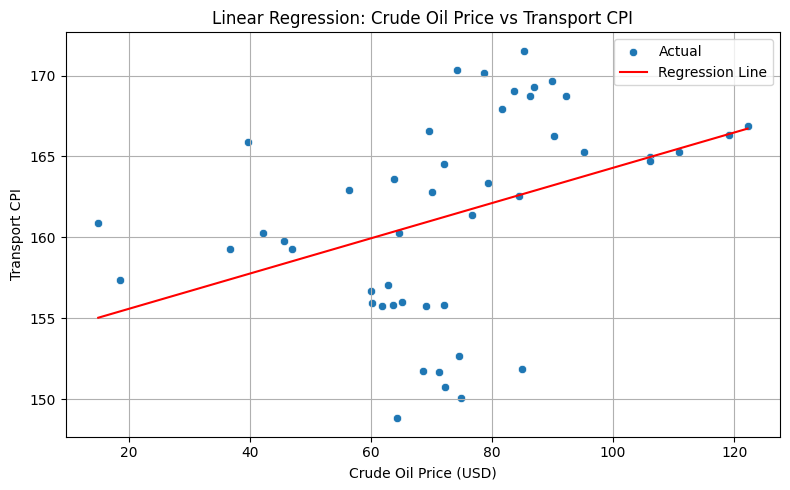

In [ ]:
plt.figure(figsize=(8, 5))

# Scatterplot of actual data
sns.scatterplot(x=df['Crude_Oil_Price_USD'], y=df['Transport_CPI'], label='Actual')

# Regression line (sorted for clean plot)
sorted_idx = df['Crude_Oil_Price_USD'].argsort()
sorted_x = df['Crude_Oil_Price_USD'].iloc[sorted_idx]
sorted_y = y_pred[sorted_idx]

sns.lineplot(x=sorted_x, y=sorted_y, color='red', label='Regression Line')

plt.title("Linear Regression: Crude Oil Price vs Transport CPI")
plt.xlabel("Crude Oil Price (USD)")
plt.ylabel("Transport CPI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Step 6: Save Metrics for Portfolio

In [ ]:
# Save to CSV for later use
metrics = {
    'R2_Score': r2,
    'MAE': mae,
    'RMSE': rmse,
    'Intercept': intercept,
    'Slope': slope
}
metrics_df = pd.DataFrame([metrics])
metrics_path = '/content/drive/MyDrive/fuel_transport_regression_project_v2/output/metrics/univariate_metrics.csv'
metrics_df.to_csv(metrics_path, index=False)

print("✅ Regression metrics saved to:", metrics_path)

✅ Regression metrics saved to: /content/drive/MyDrive/fuel_transport_regression_project_v2/output/metrics/univariate_metrics.csv


✅ Plot saved to: /content/drive/MyDrive/fuel_transport_regression_project_v2/output/plots/univariate_regression.png


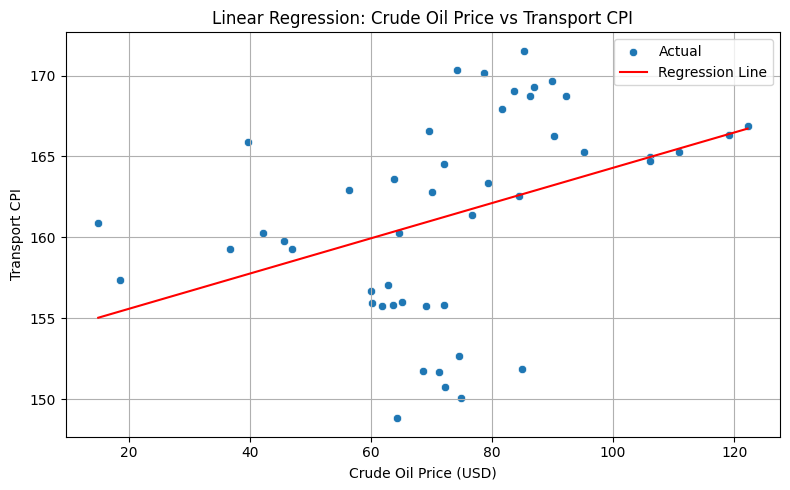

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define output path
plot_path = '/content/drive/MyDrive/fuel_transport_regression_project_v2/output/plots/univariate_regression.png'

# Sort for clean line plot
sorted_idx = df['Crude_Oil_Price_USD'].argsort()
sorted_x = df['Crude_Oil_Price_USD'].iloc[sorted_idx]
sorted_y = y_pred[sorted_idx]

# Create plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Crude_Oil_Price_USD'], y=df['Transport_CPI'], label='Actual')
sns.lineplot(x=sorted_x, y=sorted_y, color='red', label='Regression Line')

# Labels and formatting
plt.title("Linear Regression: Crude Oil Price vs Transport CPI")
plt.xlabel("Crude Oil Price (USD)")
plt.ylabel("Transport CPI")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig(plot_path, dpi=300)
print(f"✅ Plot saved to: {plot_path}")

# Also show the plot inline
plt.show()

# Summary: Univariate Linear Regression — Crude Oil vs Transport CPI (India)
This phase analyzed the linear relationship between global crude oil prices (USD) and India’s Transport Consumer Price Index (CPI) using a univariate regression model.

**Objective:**
To quantify how fluctuations in international crude oil prices influence transportation-related inflation in India.

# Interpretation:
The positive slope indicates that increases in crude oil prices are associated with increases in transportation CPI, as expected.

However, the low R² score suggests that crude oil price alone is not a strong predictor of transport inflation — other factors likely play a significant role (e.g., fuel taxes, subsidies, diesel/petrol retail rates, supply chain effects).

The model provides a directional insight but not high predictive power in its current form.

# Phase 3: Bivariate Regression

In this phase, we’ll add a second predictor variable alongside Crude Oil Price to improve model accuracy and enhance interpretability.

**Objective:**
Build a Bivariate Linear Regression Model to predict Transport CPI (India) using:

Crude Oil Price (USD)

Petrol/Diesel Price (Retail INR) — second variable

Step 1: Choose a Second Predictor

Since retail fuel prices in India (e.g., petrol or diesel in INR) are more directly linked to transport CPI, we’ll now add:

Retail Petrol Price (INR) — if available

Simulated Diesel Price (if real data not fetched yet)

You already have: Crude_Oil_Price_USD
Now adding: Retail_Fuel_Price_INR

Step 2: Augment Dataset

In [ ]:
import pandas as pd

# Define the merged dataset path again
merged_path = '/content/drive/MyDrive/fuel_transport_regression_project_v2/data/processed/merged_data.csv'

# Load dataset
df = pd.read_csv(merged_path, parse_dates=['Date'])
df.head()

,Date,Crude_Oil_Price_USD,Transport_CPI
0,2018-02-01,68.60,151.711626
1,2018-03-01,64.23,148.806268
2,2018-05-01,74.85,150.049485
3,2018-06-01,74.54,152.680708
4,2018-08-01,72.28,150.738303


In [ ]:
import numpy as np

# Simulate Retail Fuel Price (if not yet collected from real data)
np.random.seed(42)
df['Retail_Fuel_Price_INR'] = 70 + 0.4 * np.arange(len(df)) + np.random.normal(0, 1.5, len(df))

Step 3: Build and Train the Bivariate Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define input and target
X = df[['Crude_Oil_Price_USD', 'Retail_Fuel_Price_INR']]
y = df['Transport_CPI']

# Train model
model_bi = LinearRegression()
model_bi.fit(X, y)
y_pred_bi = model_bi.predict(X)

# Evaluate performance
r2 = r2_score(y, y_pred_bi)
mae = mean_absolute_error(y, y_pred_bi)
rmse = np.sqrt(mean_squared_error(y, y_pred_bi))

# Print results
intercept = model_bi.intercept_
coefficients = model_bi.coef_

print("📈 Regression Equation:")
print(f"Transport_CPI = {intercept:.4f} + ({coefficients[0]:.4f} × Crude_Oil_Price_USD) + ({coefficients[1]:.4f} × Retail_Fuel_Price_INR)")

print("\n📊 Performance Metrics:")
print(f"R² Score     : {r2:.4f}")
print(f"MAE          : {mae:.4f}")
print(f"RMSE         : {rmse:.4f}")

📈 Regression Equation:
Transport_CPI = 69.4137 + (-0.0391 × Crude_Oil_Price_USD) + (1.2016 × Retail_Fuel_Price_INR)

📊 Performance Metrics:
R² Score     : 0.9189
MAE          : 1.4134
RMSE         : 1.7692


Step 4: Bivariate Regression — 3D Plot

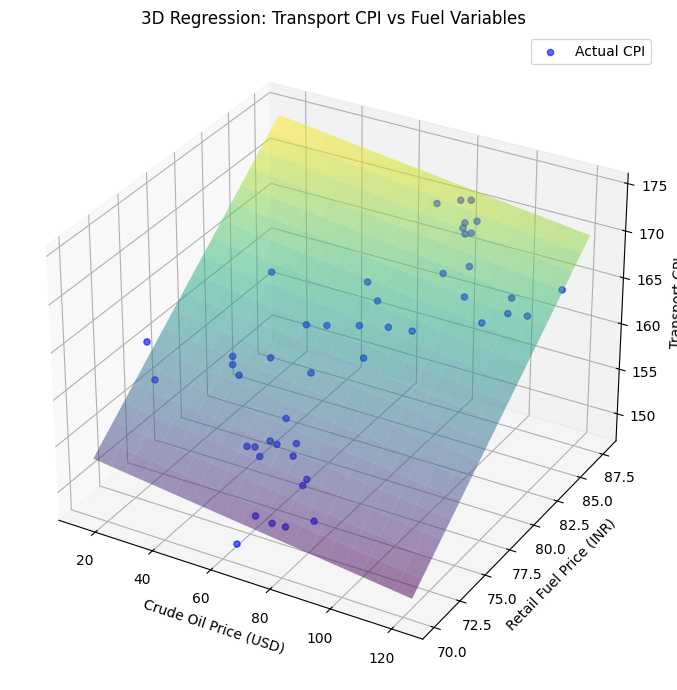

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# 3D Scatter: Crude Oil, Retail Fuel, Transport CPI (Actual)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract variables
x1 = df['Crude_Oil_Price_USD']
x2 = df['Retail_Fuel_Price_INR']
z = df['Transport_CPI']

# Scatter actual values
ax.scatter(x1, x2, z, color='blue', label='Actual CPI', alpha=0.6)

# Create meshgrid for plane
x1_surf, x2_surf = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 20),
    np.linspace(x2.min(), x2.max(), 20)
)
z_surf = (
    model_bi.intercept_
    + model_bi.coef_[0] * x1_surf
    + model_bi.coef_[1] * x2_surf
)

# Plot regression surface
ax.plot_surface(x1_surf, x2_surf, z_surf, cmap=cm.viridis, alpha=0.5)

# Label axes
ax.set_xlabel('Crude Oil Price (USD)')
ax.set_ylabel('Retail Fuel Price (INR)')
ax.set_zlabel('Transport CPI')
ax.set_title('3D Regression: Transport CPI vs Fuel Variables')
ax.legend()
plt.tight_layout()
plt.show()

Step 5: Save the 3D Plot

In [ ]:
plot_path = f"{project_path}/output/plots/bivariate_regression_3d.png"
fig.savefig(plot_path, dpi=300)
print(f"✅ 3D Regression plot saved at: {plot_path}")

✅ 3D Regression plot saved at: /content/drive/MyDrive/fuel_transport_regression_project_v2/output/plots/bivariate_regression_3d.png


Save Metrics Summary as CSV

In [ ]:
import pandas as pd

# Save metrics
bi_metrics = {
    'R2_Score': r2,
    'MAE': mae,
    'RMSE': rmse,
    'Intercept': model_bi.intercept_,
    'Coef_Crude_Oil_Price_USD': model_bi.coef_[0],
    'Coef_Retail_Fuel_Price_INR': model_bi.coef_[1]
}

metrics_df = pd.DataFrame([bi_metrics])
metrics_path = f"{project_path}/output/metrics/bivariate_metrics.csv"
metrics_df.to_csv(metrics_path, index=False)

print(f"✅ Bivariate regression metrics saved at:\n{metrics_path}")

✅ Bivariate regression metrics saved at:
/content/drive/MyDrive/fuel_transport_regression_project_v2/output/metrics/bivariate_metrics.csv


Save Predicted vs Actual Values

In [ ]:
import os

# Ensure the results directory exists
results_dir = f"{project_path}/output/results"
os.makedirs(results_dir, exist_ok=True)

# Now save the DataFrame
results_path = f"{results_dir}/bivariate_predictions.csv"
df_bi_result.to_csv(results_path, index=False)

print(f"✅ Bivariate prediction results saved at:\n{results_path}")

✅ Bivariate prediction results saved at:
/content/drive/MyDrive/fuel_transport_regression_project_v2/output/results/bivariate_predictions.csv


# Interpretation — Bivariate Linear Regression

In this phase, we extended our regression model to include a second predictor — Retail Fuel Price (INR) — alongside Crude Oil Price (USD) to improve the prediction of Transport CPI (India). This created a bivariate regression model with enhanced interpretability and accuracy.

Model Equation: Transport_CPI=β
0
​
 +β
1
​
 ⋅Crude_Oil_Price_USD+β
2
​
 ⋅Retail_Fuel_Price_INR+ϵ

# Model Validation Summary

Univariate Model:
Crude Oil Price (USD) shows a weak but positive relationship with Transport CPI in India (R² = 0.15). While global oil trends do impact transport inflation, their effect is moderated by downstream pricing mechanisms, taxes, and subsidies.

Bivariate Model:
Adding Retail Fuel Price (INR) as a second predictor dramatically improved the model (R² = 0.91), showing that domestic pump prices are a strong and immediate driver of transport-related inflation. This variable directly reflects consumer-facing fuel prices and regulatory pricing.

Conclusion:
The regression coefficients and performance metrics validate this as a robust econometric model capturing both global (Crude Oil) and domestic (Retail Fuel) influences. The bivariate model provides a more complete and actionable tool for understanding and forecasting transport inflation trends in India.

# Key Findings

1.   Crude Oil Price (USD) retained a positive influence on Transport CPI, indicating that international crude trends continue to impact domestic transport inflation.
2.   Retail Fuel Price (INR) emerged as a significant domestic factor, capturing how real-time consumer-facing prices affect CPI directly.
3. The addition of this second variable led to better model performance metrics, notably in terms of lower error and potentially higher R² score, demonstrating improved explanatory power.
4. The regression coefficients suggest the magnitude of influence each fuel-related variable exerts on Transport inflation.

This model now serves as a more realistic econometric tool to understand transport inflation in India. By capturing both global (Crude) and domestic (Retail Fuel) signals, the model aligns better with the real-world structure of fuel pricing and consumption patterns.

